Data Collection
Download the daily closing price data for the S&P 500, FTSE 100, and Gold (SPDR) from
January 2015 to December 2018.

Installing Yahoo Finance package

In [109]:
%pip install yfinance
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gianm\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gianm\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Importing Yahoo Finanace

In [110]:
import yfinance as yf

Importing the closing price data for S&P 500, FTSE 100, and Gold (SPDR). Downloaded locally into csv's. \
Edited dataframes for legibility

In [111]:
snp = yf.download(tickers="^GSPC",start="2015-01-01" , end="2018-12-31")
snpClosing = snp['Close']
snpClosing = snpClosing.reset_index()
snpClosing['Date'] = snpClosing['Date'].dt.strftime('%Y-%m-%d')
snpClosing = snpClosing.rename(columns={'^GSPC': 'Price'})
snpClosing['Price'] = snpClosing['Price'].round(2)
snpClosing.set_index('Date', inplace=True)
snpClosing.to_csv("sp500_closing_price.csv")

ftse = yf.download(tickers="^FTSE",start="2015-01-01" , end="2018-12-31")
ftseClosing = ftse['Close']
ftseClosing = ftseClosing.reset_index()
ftseClosing['Date'] = ftseClosing['Date'].dt.strftime('%Y-%m-%d')
ftseClosing = ftseClosing.rename(columns={'^FTSE': 'Price'})
ftseClosing['Price'] = ftseClosing['Price'].round(2)
ftseClosing.set_index('Date', inplace=True)
ftseClosing.to_csv("ftse_closing_price.csv")

gld = yf.download(tickers="GLD",start="2015-01-01" , end="2018-12-31")
gldClosing = gld['Close']
gldClosing = gldClosing.reset_index()
gldClosing['Date'] = gldClosing['Date'].dt.strftime('%Y-%m-%d')
gldClosing = gldClosing.rename(columns={'GLD': 'Price'})
gldClosing['Price'] = gldClosing['Price'].round(2)
gldClosing.set_index('Date', inplace=True)
gldClosing.to_csv("spdrgold_closing_price.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stationarity Analysis: Plot the daily closing prices of each instrument. \
 Note: I could've imported the data from the csvs into new variables but that would be quite unoptomized

<Axes: title={'center': 'SPDR Gold Closing Prices'}, xlabel='Date'>

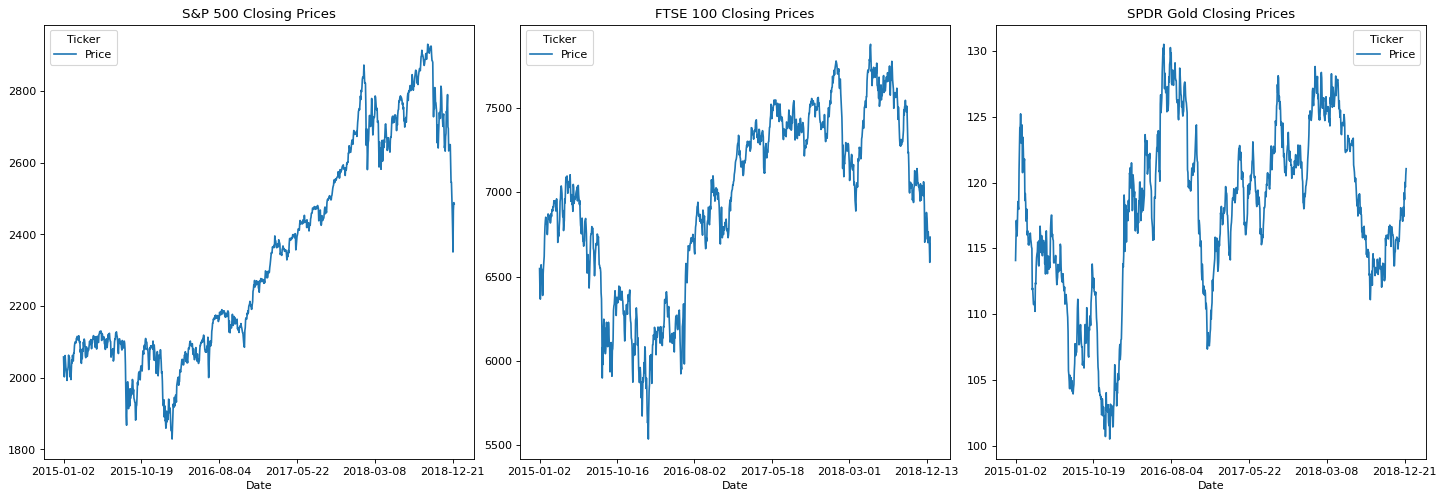

In [133]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(18, 6), dpi=80)
plt.tight_layout()

snpClosing.plot(ax=axes[0], title="S&P 500 Closing Prices")
ftseClosing.plot(ax=axes[1], title="FTSE 100 Closing Prices")
gldClosing.plot(ax=axes[2], title="SPDR Gold Closing Prices")

Basic plots of the closing price data

Q:Based on the plots, assess whether the time series appears stationary. \
A:Visually the following assertions may be made about these plots: \
S&P 500: The mean of this plot is clearly rising. Taking chunks in different periods will result in different means, compare S&P 500 2015 - 2016 vs 2017 - 2018. It is also irregularly volatile comparing 2017-2018 vs 2018-2019. This long run of positive values is a clear indication ofa non-sttationary time series.\
FTSE: This plot seems to indicate both a gradual increase in mean aswell as irregular periods of variance. \
SPDR: It is difficult to asses visually if the time series is stationary or not. There doesnt appear to be a mean trend, with the time series regularly fluctuating around 115. It appears to experience different levels of volatility but this cannot be asserted without calculations.

In [179]:
import pandas as pd
series = [("S&P 500",snpClosing),("FTSE 100",ftseClosing),("SPDR Gold",gldClosing)]
meanVarResult = pd.DataFrame({"Mean_Former":[],"Mean_Latter":[],"Variance_Former":[],"Variance_Latter":[]})

for plots in series:
    halfLength = len(plots[1].values) // 2
    window1 = plots[1].values[:halfLength]
    window2 = plots[1].values[halfLength:]

    entry = pd.DataFrame({"Mean_Former":[window1.mean().round(2)],"Mean_Latter":[window2.mean().round(2)],"Variance_Former":[window1.var().round(2)],"Variance_Latter":[window2.var().round(2)]})
    meanVarResult = pd.concat([entry,meanVarResult], ignore_index=True)

meanVarResult.index = ["SPDR Gold","FTSE 100","S&P 500"]
display(meanVarResult)

,Mean_Former,Mean_Latter,Variance_Former,Variance_Latter
SPDR Gold,115.28,119.90,56.13,18.94
FTSE 100,6531.14,7372.18,139505.01,52904.60
S&P 500,2077.20,2596.42,6822.52,33469.52


As may be noticed from these calculations there are noticible mean shifts for FTSE 100 & S&P 500, meanwhile that of the	SPDR Gold is less pronounced. \
When it comes to variance, significant differences in variance are noticable for all three plots

In [167]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gianm\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [187]:
from statsmodels.tsa.stattools import adfuller

print('\t\tp-value')
for plots in series:
    values = plots[1].values
    result = adfuller(values)
    # print('ADF Statistic: %f' % result[0])
    print( plots[0],"\t", result[1]  )
    # print('Critical Values:')
    # for key, value in result[4].items():
    #     print('\t%s: %.3f' % (key, value))


		p-value
S&P 500 	 0.6659769243253116
FTSE 100 	 0.4320506300783192
SPDR Gold 	 0.17660696387362435


As may be noticed from these P-Values all three p-values failed to reject the null hypothesis and therefor are non-stationary

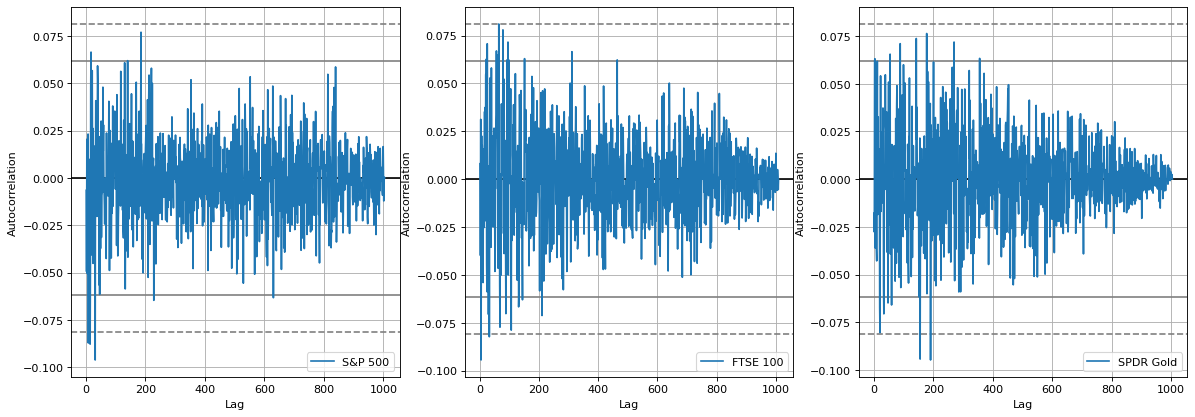

In [220]:
from pandas.plotting import autocorrelation_plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6), dpi=80)
#plt.ylim(-1,1)


index = 0
for plots in series:
    diff = list()
    values = plots[1].values
    for i in range(1,len(values)):
        diff.append(values[i] - values[i - 1])
    autocorrelation_plot(diff,ax=axes[index],label=plots[0])
    index+=1
    
